<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/svrt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Packages**

In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from functools import partial

### **Question #2**

In [2]:
def cef(x):
  return 80_000 + x + 0.25*x**2

### **Question #3**

In [3]:
xs_true = jnp.linspace(80, 3000, 1000)

### **Question #4**

In [4]:
ys_true = jax.vmap(cef)(xs_true)

### **Question # 5**

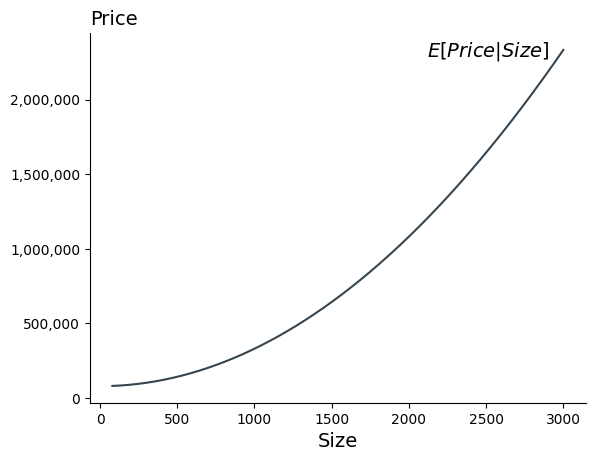

In [6]:
plt.plot(xs_true, ys_true, color="#36454F")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
ax.annotate(r'$E[Price | Size]$',
            xy = (0.68, 0.95),
            xycoords='axes fraction',
            ha='left',
            va='center',
            fontsize=14)
plt.show()

In [7]:
def Price(x, key):
  expected_price = cef(x)
  noise = jax.random.uniform(key, minval=-500_000, maxval=500_000)*(x/3000)
  return expected_price + noise

pop_size = 1_000_000
xs = jax.random.uniform(jax.random.PRNGKey(0), minval=80, maxval = 3000, shape=(pop_size,))
keys = jax.random.split(jax.random.PRNGKey(0), pop_size)
ys = jax.vmap(Price)(xs, keys)

### **Question #6**

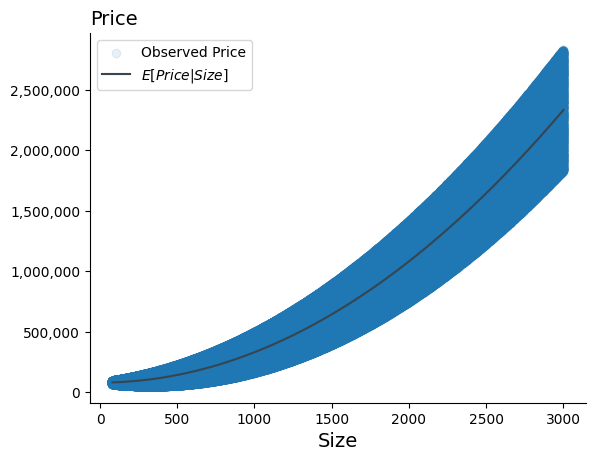

In [8]:
plt.scatter(xs, ys, alpha=0.1, label='Observed Price')
plt.plot(xs_true, ys_true, color="#36454F", label=r'$E[Price | Size]$')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.legend()
plt.show()

### **Question # 7**

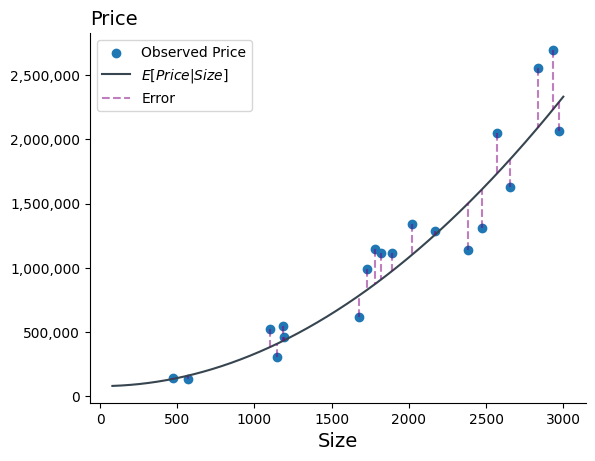

In [9]:
xs_mini = xs[:20]
ys_mini = ys[:20]


# Scatter plot of points
plt.scatter(xs_mini, ys_mini, label='Observed Price')

# Plot of true relationship line
plt.plot(xs_true, ys_true, color="#36454F", label=r'$E[Price | Size]$')

for i, (x, y) in enumerate(zip(xs_mini, ys_mini)):
    if i == 0:
      plt.plot([x, x], [y, cef(x)], color="purple", linestyle="--", alpha=0.5, label='Error')
    else:
      plt.plot([x, x], [y, cef(x)], color="purple", linestyle="--", alpha=0.5)  # Connect observed to true point


# Customize axes and appearance
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Label and title
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.legend()
plt.show()

### **Question #8**

In [10]:
df = pd.DataFrame({'price': ys, 'size': xs}) # Creates DataFrame from arrays
linear_model = smf.ols('price ~ size', data=df)

### **Question #9**

In [11]:
results = linear_model.fit()

### **Question #10**

In [12]:
def model(x):
	return results.params.values[0] + results.params.values[1]*x

### **Question #11**

In [18]:
xs_linear = jnp.linspace(80, 3000, 1000)
ys_linear = jax.vmap(model)(xs_linear)

### **Question #12**

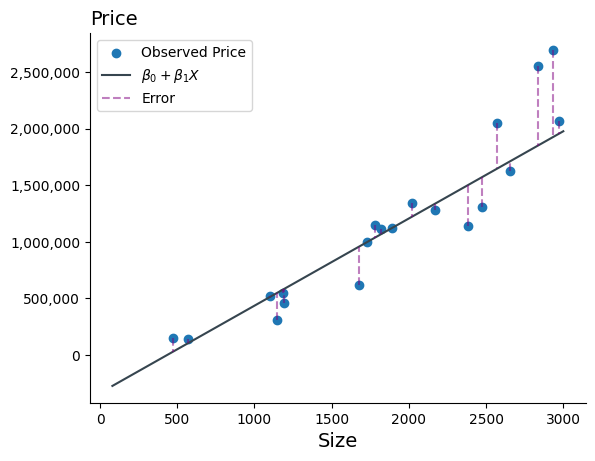

In [20]:
xs_mini = xs[:20]
ys_mini = ys[:20]


# Scatter plot of points
plt.scatter(xs_mini, ys_mini, label='Observed Price')

# Plot of true relationship line
plt.plot(xs_linear, ys_linear, color="#36454F", label=r'$\beta_0 + \beta_1X$')

for i, (x, y) in enumerate(zip(xs_mini, ys_mini)):
    if i == 0:
      plt.plot([x, x], [y, model(x)], color="purple", linestyle="--", alpha=0.5, label='Error')
    else:
      plt.plot([x, x], [y, model(x)], color="purple", linestyle="--", alpha=0.5)  # Connect observed to true point


# Customize axes and appearance
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Label and title
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.legend()
plt.show()